In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset

sys.path.append(r'C:\Users\chral\Nextcloud\code\HIDA2020\Climate_Model_Data')
from common import *

In [2]:
os.chdir(r'C:\Users\chral\Dropbox\ipp\HIDA2020')

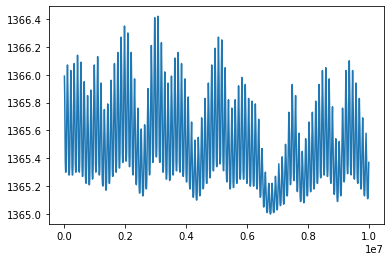

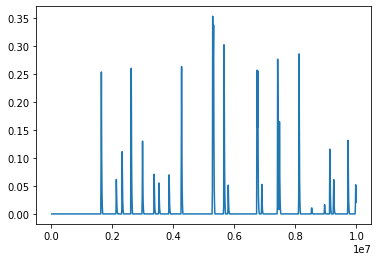

In [3]:
t, TSI = get_solar_data()
t, AOD = get_volcanic_data()

plt.figure()
plt.plot(t, TSI)
plt.figure()
plt.plot(t, AOD)

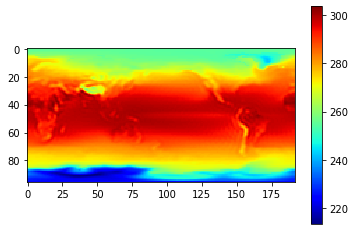

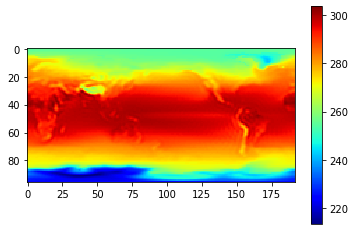

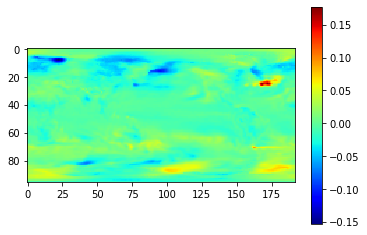

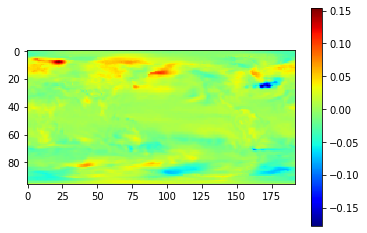

In [4]:
# Load temperature data
# The mean over time differs by less than 0.05% locally, so this is a good basis

t, lon, lat, T1 = get_geodata(1)
t, lon, lat, T2 = get_geodata(2)
T1_mean = np.mean(T1, 0)
T2_mean = np.mean(T2, 0)
T_mean = (T1_mean + T2_mean)/2.0
plt.figure()
plt.imshow(T1_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T2_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T1_mean-T_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T2_mean-T_mean, cmap='jet')
plt.colorbar()

In [5]:
tropics = np.where(np.logical_and(lat > -23.43666, lat < 23.43666))[0]

In [6]:
plt.imshow(T2m_1_mean[tropics,:], cmap='jet')

NameError: name 'T2m_1_mean' is not defined

Text(0.5, 1.0, 'Mean tropical temperature vs volcanic forcing')

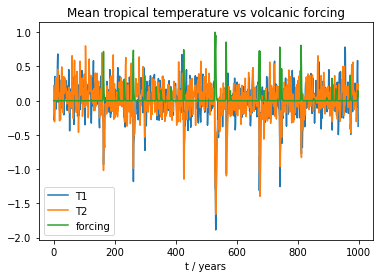

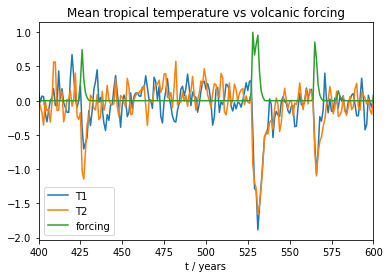

In [102]:
T1_ts = np.mean(np.mean(T1, 2), 1)
T2_ts = np.mean(np.mean(T2, 2), 1)

T1_tropics = T1[:,tropics,:]
T2_tropics = T2[:,tropics,:]

T1_tropics_ts = np.mean(np.mean(T1_tropics, 2), 1)
T2_tropics_ts = np.mean(np.mean(T2_tropics, 2), 1)


plt.figure()
plt.plot(T1_tropics_ts-np.mean(T1_tropics_ts))
plt.plot(T2_tropics_ts-np.mean(T2_tropics_ts))
plt.plot(AOD/np.max(AOD))
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs volcanic forcing')


plt.figure()
plt.plot(T1_tropics_ts-np.mean(T1_tropics_ts))
plt.plot(T2_tropics_ts-np.mean(T2_tropics_ts))
plt.plot(AOD/np.max(AOD))
plt.xlabel('t / years')
plt.xlim([400, 600])
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs volcanic forcing')


Text(0.5, 1.0, 'Mean tropical temperature vs solar forcing')

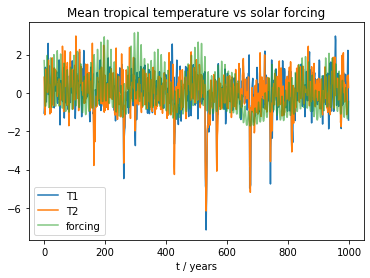

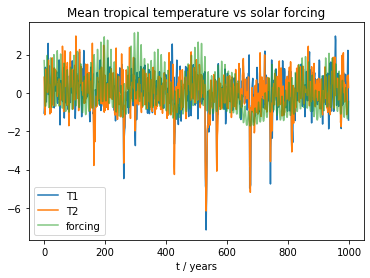

In [9]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

plt.figure()
plt.plot(normalize(T1_tropics_ts))
plt.plot(normalize(T2_tropics_ts))
plt.plot(normalize(TSI), alpha=0.6)
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs solar forcing')

plt.figure()
plt.plot(normalize(T1_tropics_ts))
plt.plot(normalize(T2_tropics_ts))
plt.plot(normalize(TSI), alpha=0.6)
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs solar forcing')

Text(0.5, 1.0, 'Solar forcing in frequency space')

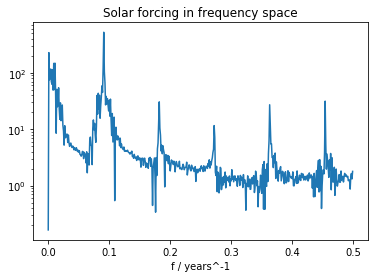

In [10]:
TSI_f = np.fft.rfft(normalize(TSI))
f = np.fft.fftfreq(len(TSI))[0:500]
plt.semilogy(f, np.abs(TSI_f))
plt.xlabel('f / years^-1')
plt.title('Solar forcing in frequency space')

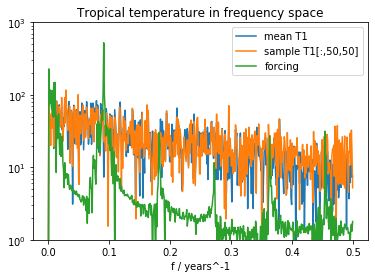

In [11]:
T1_tropics_f = np.fft.rfft(normalize(T1_tropics_ts))
T1_sample_f = np.fft.rfft(normalize(T1[:, 50, 50]))
plt.semilogy(f, np.abs(T1_tropics_f))
plt.semilogy(f, np.abs(T1_sample_f))
plt.semilogy(f, np.abs(TSI_f))
plt.xlabel('f / years^-1')
#plt.xlim([0.0, 0.15])
plt.ylim([1e0, 1e3])
plt.title('Tropical temperature in frequency space')
plt.legend(['mean T1', 'sample T1[:,50,50]', 'forcing'])

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           7.79e-33
Time:                        16:25:39   Log-Likelihood:                -471.48
No. Observations:                 276   AIC:                             947.0
Df Residuals:                     274   BIC:                             954.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        779.5514     57.261     13.614      0.000     666.824     892.279
x

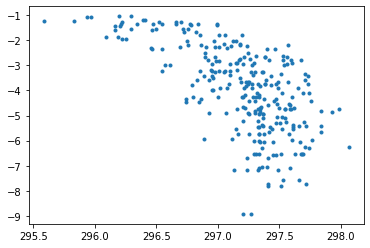

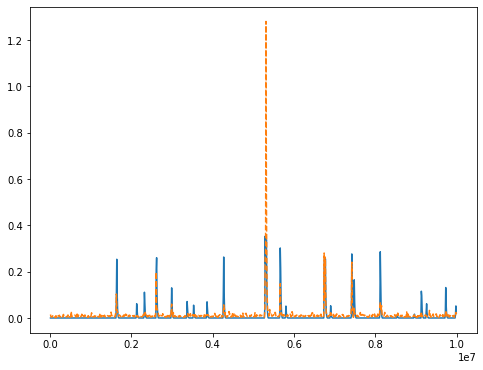

In [154]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

AODmin = 1e-10
t, AOD = get_volcanic_data()

x = np.concatenate([np.roll(T1_tropics_ts[AOD>AODmin], -1), np.roll(T2_tropics_ts[AOD>AODmin], -1)])
X = sm.add_constant(x)
y = np.log(np.concatenate([AOD[AOD>AODmin],AOD[AOD>AODmin]]))

plt.figure()
plt.plot(x, y, '.')

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

xpl = np.roll(T1_tropics_ts, -1)
Xpl = sm.add_constant(xpl)

ypred = fit.predict(Xpl)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(t, AOD, '-')
ax.plot(t, np.exp(ypred), '--')
plt.show()


In [ ]:
# to check lags
# x = np.vstack([
#     np.roll(T1_tropics_ts[AOD>AODmin], 2),
#     np.roll(T1_tropics_ts[AOD>AODmin], 1),
#     T1_tropics_ts[AOD>AODmin], 
#     np.roll(T1_tropics_ts[AOD>AODmin], -1), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -2), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -3), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -4)]).T